In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os

In [2]:
#Cargo el DF y elimino las columnas que no sirven
path = os.getcwd() + '\\'
#path = "C:\\Users\\francisco.lonardi\\Documents\\ITBA - ECD\\Analisis de Datos Científicos y Geográficos\\Datos Científicos\\data\\"
file = "experimentoadrian.dat"
f = open(path + file, "r")
df = pd.read_csv(path+file, sep=' ', header = None , index_col=False, names= ["COUNTER","AF3","F7","F3","FC5","T7","P7","O1","O2","P8","T8","FC6","F4","F8","AF4","GYRO_X","GYRO_Y","RES1","RES2","RES3","RES4","RES5"])
df = df.drop(['RES1', 'RES2', 'RES3', 'RES4', 'RES5'], axis=1)

display(df.head(5))

print('Total de registros: ' + str(df['COUNTER'].count()))


,COUNTER,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,GYRO_X,GYRO_Y
0,43,352,359,-132,-17,1024,-547,572,528,228,125,391,80,496,335,-6,3
1,44,349,328,-125,-18,1024,-548,575,527,228,125,388,90,503,340,-6,3
2,45,354,356,-125,-14,1025,-544,583,527,228,125,395,91,488,342,-6,3
3,46,360,404,-125,-13,1023,-547,581,528,228,125,400,86,482,341,-5,3
4,47,356,365,-119,-15,1025,-546,581,530,228,125,395,88,474,338,-5,3


Total de registros: 19274


In [3]:
# Chequeo de la falta de datos a través del COUNTER
cont =df['COUNTER'][0]
max_cont=128
lista_errores = []
for index, row in df.iterrows():
    if row['COUNTER']  == cont:
        cont += 1
    elif cont == (max_cont + 1):
        cont = 1
    else:
        lista_errores.append(row.name)
        cont = row['COUNTER']+1
if not lista_errores:
    print('No hay datos faltantes')
else:
    print('Lista de datos faltantes:')
    print(lista_errores)


No hay datos faltantes


In [4]:
print('Protocolo de muestreo \n 15 segundos de BASELINE \n 5 segundos descanso \n 15 segundos asintiendo con la cabeza \n 5 segundos descanso \n 15 segundos diciendo que NO con la cabeza \n 5 segundos descanso \n 15 segundos de cabeceo lateral (moviendo la cabeza de izquierda a derecha) \n 5 segundos descanso \n 15 segundos de pestañeo \n 5 segundos descanso \n 15 segundos de abrir y cerrar la boca \nTotal: 115 segundos')

Protocolo de muestreo 
 15 segundos de BASELINE 
 5 segundos descanso 
 15 segundos asintiendo con la cabeza 
 5 segundos descanso 
 15 segundos diciendo que NO con la cabeza 
 5 segundos descanso 
 15 segundos de cabeceo lateral (moviendo la cabeza de izquierda a derecha) 
 5 segundos descanso 
 15 segundos de pestañeo 
 5 segundos descanso 
 15 segundos de abrir y cerrar la boca 
Total: 115 segundos


In [5]:
# Agrego la variable segundos
n=-1
segundos_list=[]
for i in range(df['COUNTER'].count()):
    if i % 129 == 0:
        n+=1
    segundos_list.append(n)

df['seg'] = np.array(segundos_list)
display(df.head())
display(df.tail())

,COUNTER,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,GYRO_X,GYRO_Y,seg
0,43,352,359,-132,-17,1024,-547,572,528,228,125,391,80,496,335,-6,3,0
1,44,349,328,-125,-18,1024,-548,575,527,228,125,388,90,503,340,-6,3,0
2,45,354,356,-125,-14,1025,-544,583,527,228,125,395,91,488,342,-6,3,0
3,46,360,404,-125,-13,1023,-547,581,528,228,125,400,86,482,341,-5,3,0
4,47,356,365,-119,-15,1025,-546,581,530,228,125,395,88,474,338,-5,3,0


,COUNTER,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,GYRO_X,GYRO_Y,seg
19269,91,365,384,-109,-12,1024,-540,589,543,230,126,396,93,731,337,-7,3,149
19270,92,364,422,-109,-12,1025,-546,591,547,230,126,398,94,749,336,-7,3,149
19271,93,358,437,-108,-13,1027,-545,595,546,230,126,395,87,750,340,-7,3,149
19272,94,360,443,-111,-14,1022,-539,592,544,230,126,392,87,763,337,-6,3,149
19273,95,366,448,-111,-12,1022,-537,589,549,230,126,390,94,771,335,-7,3,149


In [6]:
# Elimino los primeros 2 segundos de registros porque es la inicialización y no están cubiertos en el protocolo
df= df.loc[(df.seg >= 2)]

# Saco los datos luego del fin del experimento
df= df.loc[(df.seg <= 117)]

# Vuelvo a setear los segundos
df['seg'] = df['seg'] - 2

display(df.head())
display(df.tail())

,COUNTER,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,GYRO_X,GYRO_Y,seg
258,43,358,450,-113,-19,1023,-546,590,533,228,126,393,89,737,339,-6,3,0
259,44,365,461,-119,-11,1022,-545,592,530,228,126,395,86,707,338,-6,3,0
260,45,367,465,-118,-5,1023,-542,595,529,228,126,394,83,724,335,-6,3,0
261,46,365,459,-111,-8,1025,-541,598,529,229,126,388,89,761,335,-6,3,0
262,47,366,477,-112,-11,1027,-540,597,526,228,126,394,92,774,335,-6,3,0


,COUNTER,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,GYRO_X,GYRO_Y,seg
15217,38,362,703,-118,-11,1024,-539,602,537,228,126,388,81,1015,336,-7,3,115
15218,39,360,710,-117,-16,1027,-536,600,531,229,126,388,85,1027,336,-7,3,115
15219,40,356,667,-118,-20,1026,-537,596,539,228,126,395,88,1007,336,-7,3,115
15220,41,357,670,-117,-15,1028,-537,599,543,227,126,401,86,1005,338,-7,3,115
15221,42,356,704,-117,-10,1024,-535,600,543,231,126,397,89,1022,337,-7,3,115


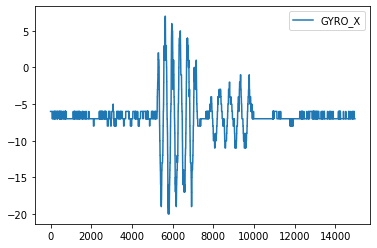

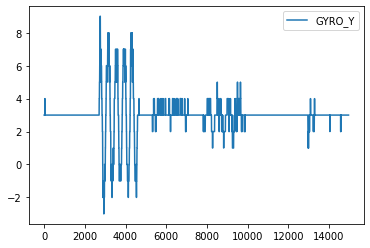

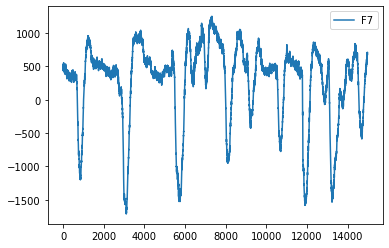

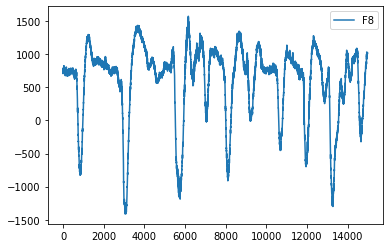

In [7]:
#Dibujo los sensores uno a uno

x =df['GYRO_X']
time = np.linspace(0, len(x), len(x))

plt.plot(time, x, '-')
plt.legend(['GYRO_X'], loc='best')
plt.show()

y =df['GYRO_Y']

plt.plot(time, y, '-')
plt.legend(['GYRO_Y'], loc='best')
plt.show()

f7 = df['F7']

plt.plot(time, f7, '-')
plt.legend(['F7'], loc='best')
plt.show()

f8 = df['F8']

plt.plot(time, f8, '-')
plt.legend(['F8'], loc='best')
plt.show()


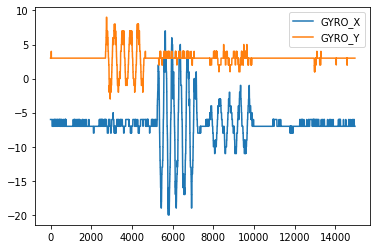

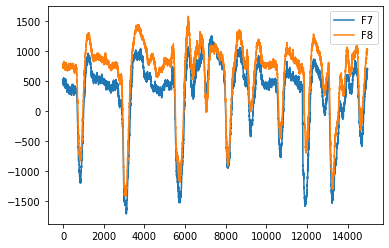

In [8]:
# Dibujo los sensores de a pares

plt.plot(time, x, '-',time, y, '-')
plt.legend(['GYRO_X','GYRO_Y'], loc='best')
plt.show()

plt.plot(time, f7, '-',time, f8, '-')
plt.legend(['F7','F8'], loc='best')
plt.show()

In [9]:
# Separo los bloques para caracterizarlos

conditions = [
    (df['seg'] < 15),
    (df['seg'] < 20) & (df['seg'] >= 15),
    (df['seg'] < 35) & (df['seg'] >= 20),
    (df['seg'] < 40) & (df['seg'] >= 35),
    (df['seg'] < 55) & (df['seg'] >= 40),
    (df['seg'] < 60) & (df['seg'] >= 55),
    (df['seg'] < 75) & (df['seg'] >= 60),
    (df['seg'] < 80) & (df['seg'] >= 75),
    (df['seg'] < 95) & (df['seg'] >= 80),
    (df['seg'] < 100) & (df['seg'] >= 95),
    (df['seg'] < 115) & (df['seg'] >= 100),
    ]
choices = ['baseline', 'descanso', 'asintiendo cabeza', 'descanso', 'no cabeza', 'descanso', 'cabeceo lateral', 'descanso', 'pestañeo', 'descanso','abrir y cerrar boca']

df['bloque'] = np.select(conditions, choices, default='descanso')

print(df)


       COUNTER  AF3   F7   F3  FC5    T7   P7   O1   O2   P8   T8  FC6  F4  \
258         43  358  450 -113  -19  1023 -546  590  533  228  126  393  89   
259         44  365  461 -119  -11  1022 -545  592  530  228  126  395  86   
260         45  367  465 -118   -5  1023 -542  595  529  228  126  394  83   
261         46  365  459 -111   -8  1025 -541  598  529  229  126  388  89   
262         47  366  477 -112  -11  1027 -540  597  526  228  126  394  92   
...        ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ..   
15217       38  362  703 -118  -11  1024 -539  602  537  228  126  388  81   
15218       39  360  710 -117  -16  1027 -536  600  531  229  126  388  85   
15219       40  356  667 -118  -20  1026 -537  596  539  228  126  395  88   
15220       41  357  670 -117  -15  1028 -537  599  543  227  126  401  86   
15221       42  356  704 -117  -10  1024 -535  600  543  231  126  397  89   

         F8  AF4  GYRO_X  GYRO_Y  seg    bloque  
258     737  

In [10]:
# Features de series
from collections import Counter
from scipy import stats

def crest_factor(x):
    return np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))

# GYRO_X

ptp_x = abs(np.max(x)) + abs(np.min(x))
rms_x = np.sqrt(np.mean(x**2))
cf_x = crest_factor(x)
entropy_x = stats.entropy(list(Counter(x).values()), base=2)

print ('Peak-To-Peak (x):' + str(ptp_x))
print ('Root Mean Square (x):' + str(rms_x))
print ('Crest Factor (x):' + str(cf_x))
print('Shannon Entropy (x):' + str(entropy_x))
print('')

# GYRO_Y

ptp_y = abs(np.max(y)) + abs(np.min(y))
rms_y = np.sqrt(np.mean(y**2))
cf_y = crest_factor(y)
entropy_y = stats.entropy(list(Counter(y).values()), base=2)

print ('Peak-To-Peak (y):' + str(ptp_y))
print ('Root Mean Square (y):' + str(rms_y))
print ('Crest Factor (y):' + str(cf_y))
print('Shannon Entropy (y):' + str(entropy_y))
print('')

# F7

ptp_f7 = abs(np.max(f7)) + abs(np.min(f7))
rms_f7 = np.sqrt(np.mean(f7**2))
cf_f7 = crest_factor(f7)
entropy_f7 = stats.entropy(list(Counter(f7).values()), base=2)

print ('Peak-To-Peak (f7):' + str(ptp_f7))
print ('Root Mean Square (f7):' + str(rms_f7))
print ('Crest Factor (f7):' + str(cf_f7))
print('Shannon Entropy (f7):' + str(entropy_f7))
print('')

# F8

ptp_f8 = abs(np.max(f8)) + abs(np.min(f8))
rms_f8 = np.sqrt(np.mean(f8**2))
cf_f8 = crest_factor(f8)
entropy_f8 = stats.entropy(list(Counter(f8).values()), base=2)

print ('Peak-To-Peak (f8):' + str(ptp_f8))
print ('Root Mean Square (f8):' + str(rms_f8))
print ('Crest Factor (f8):' + str(cf_f8))
print('Shannon Entropy (f8):' + str(entropy_f8))
print('')

Peak-To-Peak (x):27
Root Mean Square (x):7.3514469132812055
Crest Factor (x):2.720552870193183
Shannon Entropy (x):2.5197303238238073

Peak-To-Peak (y):12
Root Mean Square (y):3.181649721115588
Crest Factor (y):2.8287211946273936
Shannon Entropy (y):1.3805451210493909

Peak-To-Peak (f7):2961
Root Mean Square (f7):669.370773805854
Crest Factor (f7):2.5561319181471505
Shannon Entropy (f7):10.597243695630777

Peak-To-Peak (f8):2987
Root Mean Square (f8):833.3527765440938
Crest Factor (f8):1.8899559038268408
Shannon Entropy (f8):10.521967557741752



GYRO_X


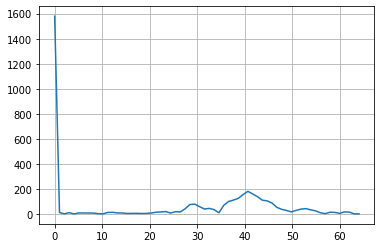

GYRO_Y


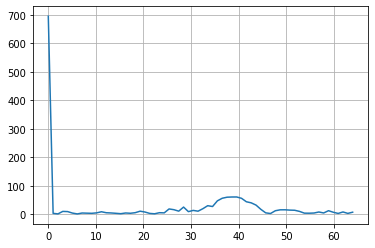

F7


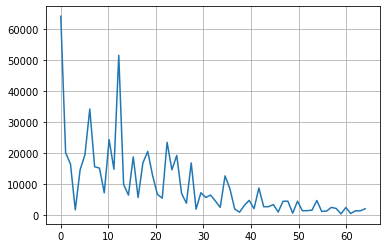

F8


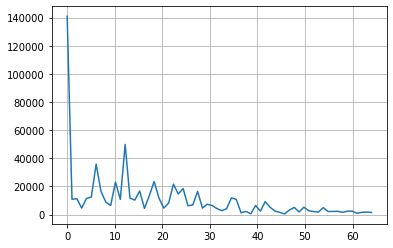

In [11]:
# Filtros Espectrales

import numpy as np

from struct import *

import sys, select

import time
import datetime
import os

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def psd(y):
    # Number of samplepoints
    N = 128
    # sample spacing
    T = 1.0 / 128.0
    # From 0 to N, N*T, 2 points.
    #x = np.linspace(0.0, 1.0, N)
    #y = 1*np.sin(10.0 * 2.0*np.pi*x) + 9*np.sin(20.0 * 2.0*np.pi*x)


    # Original Bandpass
    fs = 128.0
    fso2 = fs/2
    #Nd,wn = buttord(wp=[9/fso2,11/fso2], ws=[8/fso2,12/fso2],
    #   gpass=3.0, gstop=40.0)
    #b,a = butter(Nd,wn,'band')
    #y = filtfilt(b,a,y)

    y = butter_bandpass_filter(y, 8.0, 15.0, fs, order=6)


    yf = fft(y)
    #xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    #import matplotlib.pyplot as plt
    #plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
    #plt.axis((0,60,0,1))
    #plt.grid()
    #plt.show()

    return np.sum(np.abs(yf[0:int(N/2)]))

N = 128
# sample spacing
T = 1.0 / 128.0
xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))

# Filtro espectral para GYRO_X

print('GYRO_X')
yf = fft(x)

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

# Filtro espectral para GYRO_Y

print('GYRO_Y')
yf = fft(y)

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

# Filtro espectral para F7

print('F7')
yf = fft(f7)

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

# Filtro espectral para F8

print('F8')
yf = fft(f8)

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

In [12]:
# Normalización de datos
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df.loc[:, df.columns != 'bloque'])
df_scaled = pd.DataFrame(df_scaled, columns=['COUNTER', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'GYRO_X', 'GYRO_Y', 'seg'])
df_scaled['bloque'] = df['bloque']
print(df_scaled.shape)
print(df.shape)

(14964, 19)
(14964, 19)


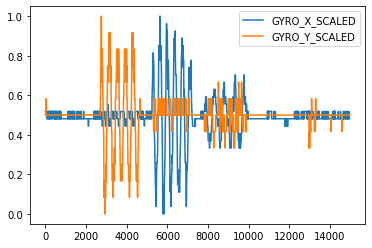

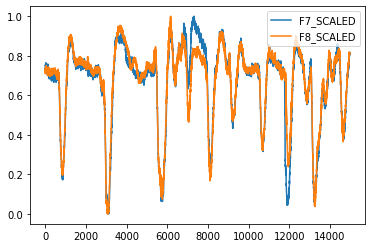

In [13]:
# Vuelvo a dibujar los sensores de a pares
x_scaled = df_scaled['GYRO_X']
time = np.linspace(0, len(x_scaled), len(x_scaled))
y_scaled = df_scaled['GYRO_Y']
plt.plot(time, x_scaled, '-',time, y_scaled, '-')
plt.legend(['GYRO_X_SCALED','GYRO_Y_SCALED'], loc='best')
plt.show()

f7_scaled = df_scaled['F7']
f8_scaled = df_scaled['F8']

plt.plot(time, f7_scaled, '-',time, f8_scaled, '-')
plt.legend(['F7_SCALED','F8_SCALED'], loc='best')
plt.show()

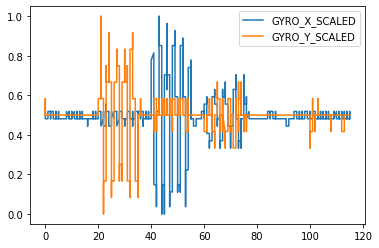

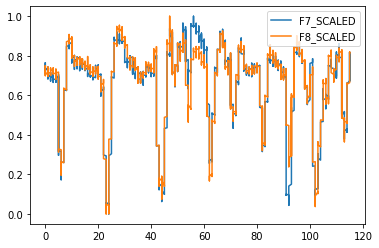

In [14]:
# Vuelvo a dibujar los sensores de a pares por segundo

seg = df['seg']

plt.plot(seg, x_scaled, '-',seg, y_scaled, '-')
plt.legend(['GYRO_X_SCALED','GYRO_Y_SCALED'], loc='best')
plt.show()

plt.plot(seg, f7_scaled, '-',seg, f8_scaled, '-')
plt.legend(['F7_SCALED','F8_SCALED'], loc='best')
plt.show()

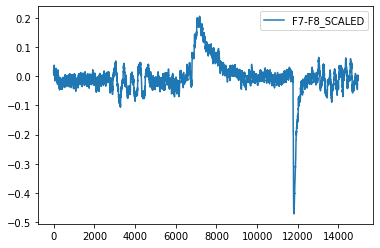

In [15]:
#Agrego una nueva columna que sea la resta de F7-F8

df_scaled['F7-F8'] = df_scaled['F7'] - df_scaled['F8']

f7f8_scaled = df_scaled['F7-F8']
plt.plot(time, f7f8_scaled, '-')
plt.legend(['F7-F8_SCALED'], loc='best')
plt.show()

In [16]:
# Caracterizo cada bloque
df_scaled[['GYRO_X','GYRO_Y','F7','F8','F7-F8','bloque']].groupby(['bloque']).agg(['mean', 'min', 'max', 'std'])

GYRO_X                                  GYRO_Y  \
                         mean       min       max       std      mean   
bloque                                                                  
abrir y cerrar boca  0.485501  0.481481  0.518519  0.011523  0.499031   
asintiendo cabeza    0.494899  0.444444  0.555556  0.023203  0.476529   
baseline             0.487472  0.444444  0.518519  0.014932  0.500000   
cabeceo lateral      0.492181  0.333333  0.703704  0.098897  0.489966   
descanso             0.495389  0.148148  0.814815  0.057187  0.505194   
no cabeza            0.490056  0.000000  1.000000  0.270186  0.508312   
pestañeo             0.483931  0.444444  0.518519  0.015518  0.500000   

                                                         F7            \
                          min       max       std      mean       min   
bloque                                                                  
abrir y cerrar boca  0.416667  0.583333  0.009759  0.568357  0.059439   
asintiendo cabeza    0.000000  0.916667  0.239087  0.664143  0.000000   
baseline             0.500000  0.500000  0.000000  0.682499  0.172915   
cabeceo lateral      0.333333  0.666667  0.065008  0.692042  0.255995   
descanso             0.333333  1.000000  0.059117  0.734997  0.241135   
no cabeza            0.416667  0.583333  0.030657  0.679150  0.062817   
pestañeo             0.500000  0.500000  0.000000  0.616569  0.043229   

                                               F8                      \
                          max       std      mean       min       max   
bloque                                                                  
abrir y cerrar boca  0.861533  0.211334  0.580211  0.037496  0.838299   
asintiendo cabeza    0.929416  0.250553  0.685031  0.000000  0.954135   
baseline             0.901722  0.169523  0.697369  0.196183  0.907600   
cabeceo lateral      0.933806  0.177684  0.680035  0.167392  0.924674   
descanso             0.964201  0.096077  0.722511  0.262136  0.846669   
no cabeza            1.000000  0.268208  0.647763  0.074992  1.000000   
pestañeo             0.869301  0.236452  0.664568  0.238701  0.901573   

                                  F7-F8                                
                          std      mean       min       max       std  
bloque                                                                 
abrir y cerrar boca  0.210071 -0.011854 -0.088971  0.062994  0.030254  
asintiendo cabeza    0.255614 -0.020888 -0.105723  0.052056  0.037286  
baseline             0.169107 -0.014870 -0.054346  0.022452  0.013117  
cabeceo lateral      0.189105  0.012006 -0.046987  0.095469  0.024632  
descanso             0.070575  0.012486 -0.057393  0.148858  0.043592  
no cabeza            0.247047  0.031388 -0.070239  0.205929  0.076500  
pestañeo             0.181184 -0.048000 -0.471694  0.031036  0.100013

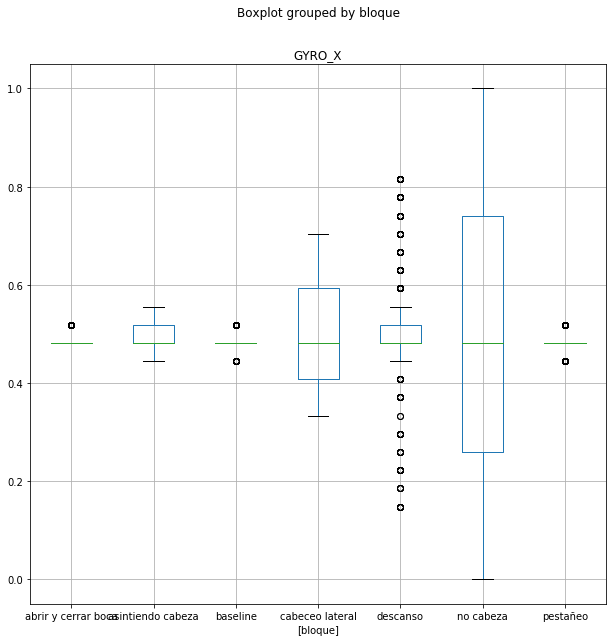

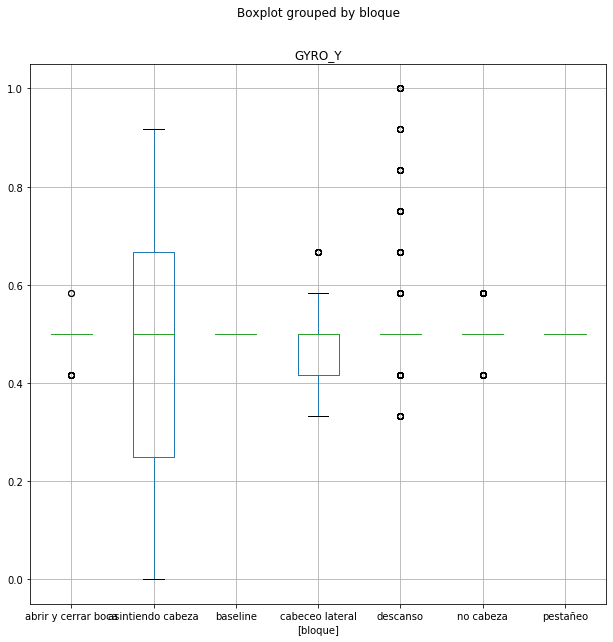

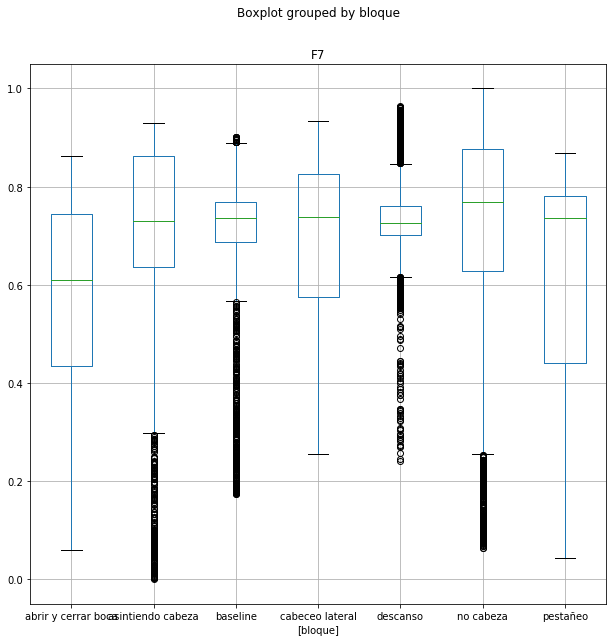

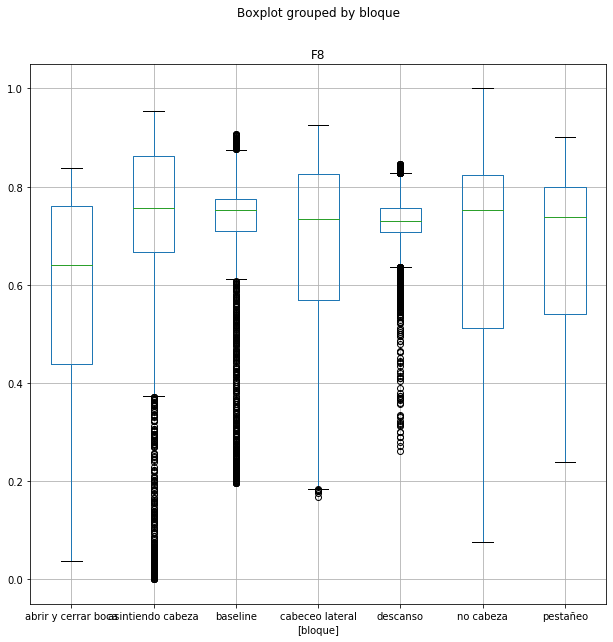

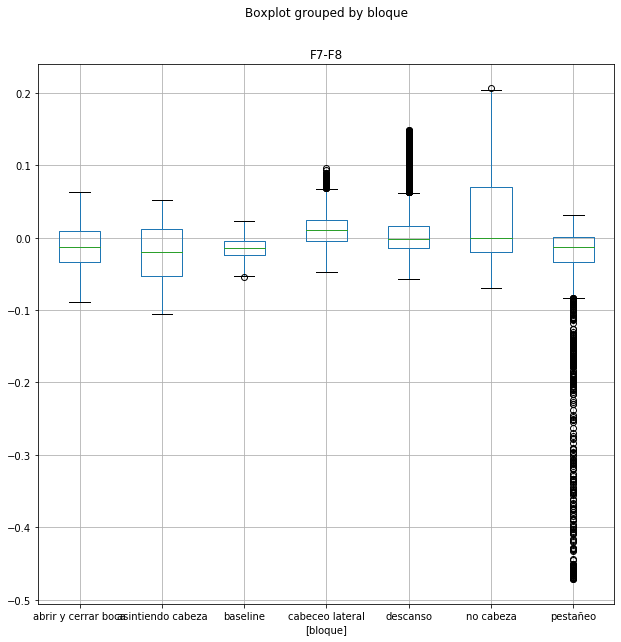

In [17]:
# Boxplots
df_scaled[['GYRO_X','bloque']].boxplot(by='bloque', figsize=(10,10))

df_scaled[['GYRO_Y','bloque']].boxplot(by='bloque', figsize=(10,10))

df_scaled[['F7','bloque']].boxplot(by='bloque', figsize=(10,10))

df_scaled[['F8','bloque']].boxplot(by='bloque', figsize=(10,10))

df_scaled[['F7-F8','bloque']].boxplot(by='bloque', figsize=(10,10))